# Analyzing some Reddit comments

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
from glob import glob
from pprint import pprint
%matplotlib inline

In [105]:
base_path = '/home/william/wikidemics/data/reddit/RC_2008-*'
file_paths = glob(base_path)
good_columns = ['created_utc', 'subreddit', 'score', 'body']
comments = pd.DataFrame(columns=good_columns)
for path in file_paths:
    df = pd.read_json(path, lines=True)
    bad_columns = set(df.columns) - (set(good_columns))
    df.drop(bad_columns, axis=1, inplace=True)
    # filter comments down to those that are only flu related
    df = df[df.apply(lambda r: 'flu ' in r['body'].lower(), axis=1)]
    comments = comments.append(df)
# create timeseries
comments['created_utc'] = pd.to_datetime(comments.loc[:, 'created_utc'], unit='s')
comments.set_index('created_utc', inplace=True)
%store comments

Stored 'comments' (DataFrame)


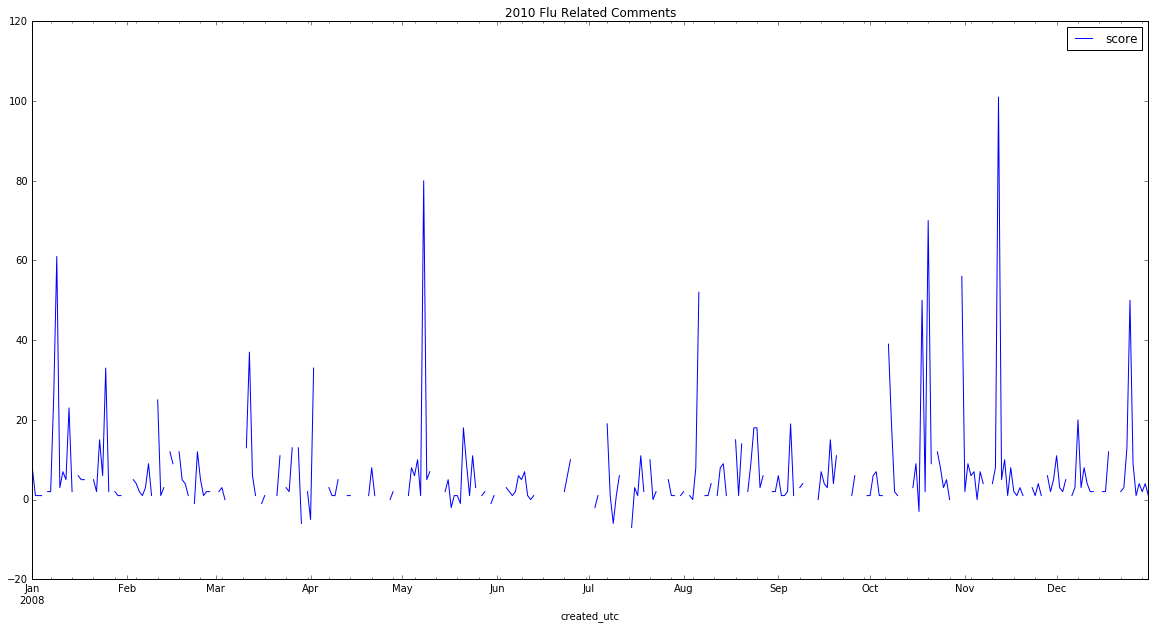

In [119]:
comments.resample('1D').sum().plot(figsize=[20,10])
plt.title('2010 Flu Related Comments')

In [111]:
comments2011 = pd.read_csv('/home/william/wikidemics/data/reddit/2011.csv')
comments2011['created_utc'] = pd.to_datetime(comments2011.loc[:, 'created_utc'], unit='s')
comments2011.set_index('created_utc', inplace=True)
comments2011[:5]

,body,score,subreddit
created_utc,,,
2011-02-18 12:59:09,I have friends who routinely take Oscillococci...,2,atheism
2011-08-03 09:13:28,Cabin fever is what I was worrying about a lit...,2,engineering
2011-09-18 15:12:20,One symptom that's not listed is decreased in ...,2,Health
2011-06-08 09:37:56,yup. they kept asking me why i didn't come in...,2,AskReddit
2011-05-30 18:54:30,"Sure, that's the intent. But did you read the ...",1,conspiracy


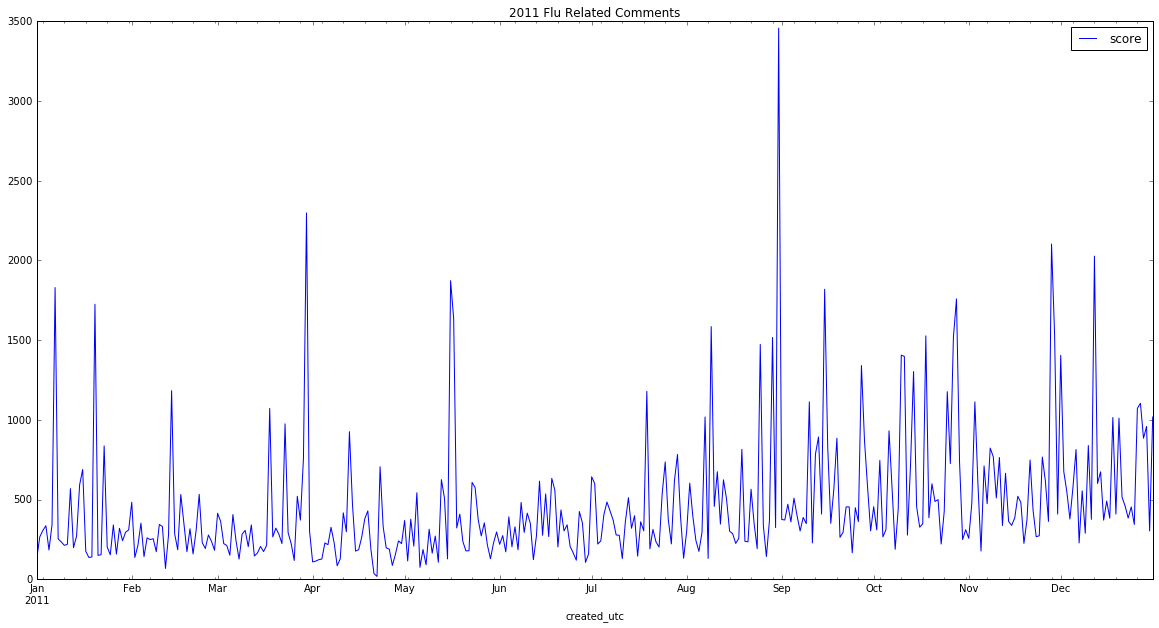

In [120]:
comments2011.resample('1D').sum().plot(figsize=[20,10])
plt.title('2011 Flu Related Comments')